<a href="https://colab.research.google.com/github/evolden/Boston-Housing/blob/main/notebooks/DS210_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('modified_BostonHousing.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,-222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,496.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,491.000000
mean,3.576408,11.363636,11.136779,0.069170,0.554695,6.284505,68.574901,3.795043,9.549407,405.695652,18.455534,356.674032,12.573909,22.588595
std,8.463332,23.322453,6.860353,0.253994,0.115878,0.706450,28.148861,2.105710,8.707259,174.577970,2.164946,91.294864,7.138118,9.227012
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,-233.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.922500,17.100000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.300000,21.200000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.860000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,55.000000


In [ ]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


### First, I need to look for any outliers. Right away I can see that the MIN value in the 'tax' column is a negative value, which was likely entered by mistake. Another low value is the MIN value in the 'b' column.

In [ ]:
df.sort_values('tax', ascending=True).head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,-233,17.9,396.90,10.21,19.3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,-222,18.7,396.90,5.33,36.2
124,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,-188,19.1,379.38,NaN,18.8
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
126,0.38735,0.0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7


Looking at the top 3 entries in the 'tax' column I can see that they are all negative. I could replace the values with the mean tax value but the entries themselve bring the mean value down so it won't be very accurate. Instead I am opting to delete these 3 rows all together.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = df[df.tax > 1]

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,493.000000,503.000000,503.000000,503.000000,503.000000,498.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,484.000000,488.000000
mean,3.597484,11.431412,11.134135,0.069583,0.555047,6.284797,68.618489,3.791496,9.590457,409.393638,18.454871,356.468946,12.593760,22.575205
std,8.484760,23.375438,6.835986,0.254695,0.116039,0.706771,28.156609,2.107248,8.716842,168.363544,2.171045,91.526202,7.144445,9.232005
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.887250,45.050000,2.100350,4.000000,280.500000,17.350000,375.270000,6.927500,17.075000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.330000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.623500,94.050000,5.164950,24.000000,666.000000,20.200000,396.210000,16.910000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,55.000000


In [ ]:
df.sort_values('b', ascending=True).head(30)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7
456,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


Here I can see that the min value for the 'b' column is much lower than any other instance. Due to the mean being so much higher I am opting not to replace it with the mean, instead I am going to leave this row as is.

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,493.000000,503.000000,503.000000,503.000000,503.000000,498.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,484.000000,488.000000
mean,3.597484,11.431412,11.134135,0.069583,0.555047,6.284797,68.618489,3.791496,9.590457,409.393638,18.454871,356.468946,12.593760,22.575205
std,8.484760,23.375438,6.835986,0.254695,0.116039,0.706771,28.156609,2.107248,8.716842,168.363544,2.171045,91.526202,7.144445,9.232005
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.887250,45.050000,2.100350,4.000000,280.500000,17.350000,375.270000,6.927500,17.075000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.330000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.623500,94.050000,5.164950,24.000000,666.000000,20.200000,396.210000,16.910000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,55.000000


In [ ]:
df.sort_values('zn', ascending=True).tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
284,0.00906,90.0,2.97,0,0.4000,7.088,20.8,7.3073,1,285,15.3,394.72,NaN,32.2
353,0.01709,90.0,2.02,0,0.4100,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,NaN,50.0
256,0.01538,90.0,3.75,0,0.3940,7.454,34.2,6.3361,3,244,15.9,386.34,3.11,44.0
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6


In [ ]:
df.sort_values('crim', ascending=True).tail(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
417,25.9406,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
413,28.6558,0.0,18.10,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
427,37.6619,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
398,38.3518,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
414,45.7461,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
410,51.1358,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
405,67.9208,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
380,80.0000,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4


### Upon further review of the data and the feature explanation page, I realized that the MAX value for the 'medv' column is 55 when the data should have been censored at 50. I am going to replace it with the censored value of 50.

In [ ]:
df.sort_values('medv', ascending=True).tail(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,55.0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,NaN
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80,NaN
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,NaN
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,NaN
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,NaN


In [ ]:
df.medv[df.medv == 55.0] = df.medv.mean()

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,493.000000,503.000000,503.000000,503.000000,503.000000,498.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,484.000000,488.000000
mean,3.597484,11.431412,11.134135,0.069583,0.555047,6.284797,68.618489,3.791496,9.590457,409.393638,18.454871,356.468946,12.593760,22.508761
std,8.484760,23.375438,6.835986,0.254695,0.116039,0.706771,28.156609,2.107248,8.716842,168.363544,2.171045,91.526202,7.144445,9.114090
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.887250,45.050000,2.100350,4.000000,280.500000,17.350000,375.270000,6.927500,17.075000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.330000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.623500,94.050000,5.164950,24.000000,666.000000,20.200000,396.210000,16.910000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,50.000000


### Now that outliers are handled, it's time to get to work on these missing values.

In [ ]:
sum(df['crim'].isnull())

10

### Here we see the 10 entries in the 'crim' column that are null (NaN), then we can see the entries with the highest crime rates.

In [ ]:
df.sort_values('crim', ascending=True).tail(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
417,25.9406,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
413,28.6558,0.0,18.10,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
427,37.6619,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
398,38.3518,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
414,45.7461,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
410,51.1358,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
405,67.9208,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
380,80.0000,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4


Since this is a relatively small data set, I've decided to handle the null values by replacing them with the mean or average value.

In [ ]:
df.crim = df.crim.fillna(df.crim.mean())

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,503.000000,503.000000,503.000000,503.000000,503.000000,498.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,484.000000,488.000000
mean,3.597484,11.431412,11.134135,0.069583,0.555047,6.284797,68.618489,3.791496,9.590457,409.393638,18.454871,356.468946,12.593760,22.508761
std,8.399825,23.375438,6.835986,0.254695,0.116039,0.706771,28.156609,2.107248,8.716842,168.363544,2.171045,91.526202,7.144445,9.114090
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082865,0.000000,5.190000,0.000000,0.449000,5.887250,45.050000,2.100350,4.000000,280.500000,17.350000,375.270000,6.927500,17.075000
50%,0.283920,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.330000,21.200000
75%,3.597484,12.500000,18.100000,0.000000,0.624000,6.623500,94.050000,5.164950,24.000000,666.000000,20.200000,396.210000,16.910000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,50.000000


In [ ]:
sum(df['crim'].isnull())

0

### Next I'm looking at 'rm' or the average number of rooms per dwelling and replacing the null values with the mean

In [ ]:
sum(df['rm'].isnull())

5

In [ ]:
df.sort_values('rm', ascending=True).tail(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
233,0.331470,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.368940,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
224,0.315330,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
267,0.578340,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0
232,0.575290,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
163,1.519020,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
262,0.520140,20.0,3.97,0,0.6470,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,NaN
257,0.611540,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
225,3.597484,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
364,3.474280,0.0,18.10,1,0.7180,9.000,82.9,1.9047,24,666,20.2,354.55,5.29,21.9


In [ ]:
df.rm = df.rm.fillna(df.rm.mean())

In [ ]:
sum(df['rm'].isnull())

0

The next column with possible null values is 'lstat' which is the percent lower status of the population

In [ ]:
sum(df['lstat'].isnull())

19

In [ ]:
df.sort_values('lstat', ascending=True).tail(29)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
438,13.67810,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,68.95,34.02,8.4
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,40.00,13.8


In [ ]:
df.lstat = df.lstat.fillna(df.lstat.mean())

In [ ]:
sum(df['lstat'].isnull())

0

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,488.000000
mean,3.597484,11.431412,11.134135,0.069583,0.555047,6.284797,68.618489,3.791496,9.590457,409.393638,18.454871,356.468946,12.593760,22.508761
std,8.399825,23.375438,6.835986,0.254695,0.116039,0.703243,28.156609,2.107248,8.716842,168.363544,2.171045,91.526202,7.007938,9.114090
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082865,0.000000,5.190000,0.000000,0.449000,5.888000,45.050000,2.100350,4.000000,280.500000,17.350000,375.270000,7.185000,17.075000
50%,0.283920,0.000000,9.690000,0.000000,0.538000,6.211000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.690000,21.200000
75%,3.597484,12.500000,18.100000,0.000000,0.624000,6.618500,94.050000,5.164950,24.000000,666.000000,20.200000,396.210000,16.490000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,50.000000


The last column with null values is 'medv' which is the median value of owner-occupied homes in $1000's

In [ ]:
sum(df['medv'].isnull())

15

In [ ]:
df.sort_values('medv', ascending=True).tail(25)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
204,0.020090,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88000,50.0
225,3.597484,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63000,50.0
372,8.267250,0.0,18.10,1,0.6680,5.875,89.6,1.1296,24,666,20.2,347.88,8.88000,50.0
371,9.232300,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666,20.2,366.15,9.53000,50.0
162,1.833770,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92000,50.0
195,0.013810,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97000,50.0
166,2.010190,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70000,50.0
163,1.519020,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32000,50.0
186,0.056020,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45000,50.0
267,0.578340,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44000,50.0


In [ ]:
df.medv = df.medv.fillna(df.medv.mean())

In [ ]:
sum(df['medv'].isnull())

0

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.597484,11.431412,11.134135,0.069583,0.555047,6.284797,68.618489,3.791496,9.590457,409.393638,18.454871,356.468946,12.593760,22.508761
std,8.399825,23.375438,6.835986,0.254695,0.116039,0.703243,28.156609,2.107248,8.716842,168.363544,2.171045,91.526202,7.007938,8.976890
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082865,0.000000,5.190000,0.000000,0.449000,5.888000,45.050000,2.100350,4.000000,280.500000,17.350000,375.270000,7.185000,17.200000
50%,0.283920,0.000000,9.690000,0.000000,0.538000,6.211000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.690000,21.500000
75%,3.597484,12.500000,18.100000,0.000000,0.624000,6.618500,94.050000,5.164950,24.000000,666.000000,20.200000,396.210000,16.490000,25.000000
max,80.000000,100.000000,27.740000,1.000000,0.871000,9.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,40.000000,50.000000


In [ ]:
df.corr(numeric_only =True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.202219,0.405506,-0.053651,0.418983,-0.218193,0.353998,-0.379437,0.621363,0.577678,0.286056,-0.386536,0.450705,-0.382148
zn,-0.202219,1.000000,-0.537521,-0.043530,-0.519278,0.311014,-0.572244,0.667202,-0.315064,-0.319417,-0.391872,0.176822,-0.396099,0.365532
indus,0.405506,-0.537521,1.000000,0.063471,0.765616,-0.384341,0.643822,-0.707115,0.600937,0.729768,0.384548,-0.358841,0.588014,-0.478962
chas,-0.053651,-0.043530,0.063471,1.000000,0.090537,0.093846,0.086347,-0.098960,-0.008673,-0.037618,-0.121479,0.049435,-0.042285,0.187149
nox,0.418983,-0.519278,0.765616,0.090537,1.000000,-0.298057,0.731065,-0.768878,0.611317,0.668600,0.188849,-0.379396,0.570801,-0.426564
rm,-0.218193,0.311014,-0.384341,0.093846,-0.298057,1.000000,-0.237954,0.195317,-0.208871,-0.289996,-0.355045,0.128014,-0.592770,0.674331
age,0.353998,-0.572244,0.643822,0.086347,0.731065,-0.237954,1.000000,-0.747338,0.457166,0.508690,0.261180,-0.273344,0.587725,-0.389914
dis,-0.379437,0.667202,-0.707115,-0.098960,-0.768878,0.195317,-0.747338,1.000000,-0.495553,-0.536332,-0.232457,0.291231,-0.483068,0.254355
rad,0.621363,-0.315064,0.600937,-0.008673,0.611317,-0.208871,0.457166,-0.495553,1.000000,0.910102,0.465992,-0.443694,0.486831,-0.376307
tax,0.577678,-0.319417,0.729768,-0.037618,0.668600,-0.289996,0.508690,-0.536332,0.910102,1.000000,0.463274,-0.441240,0.539792,-0.461654


<Axes: xlabel='indus', ylabel='nox'>

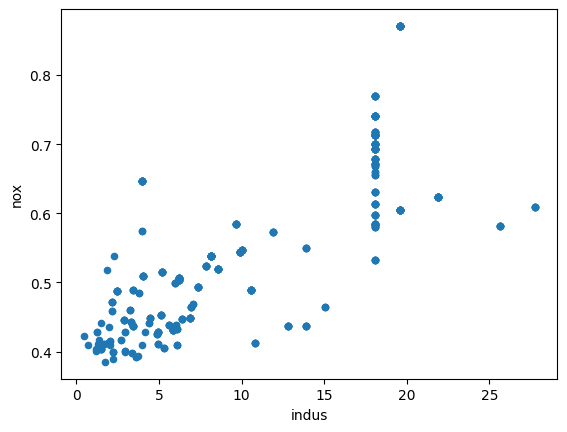

In [ ]:
df.plot.scatter('indus', 'nox')

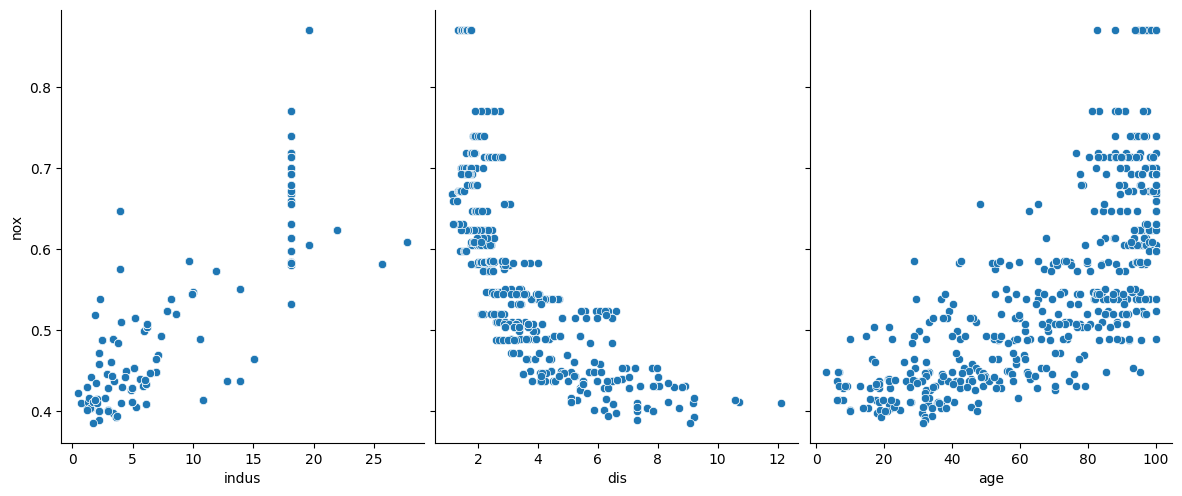

In [ ]:
sns.pairplot(df, x_vars=['indus', 'dis', 'age'], y_vars='nox',height=5, aspect=0.8, kind='scatter');

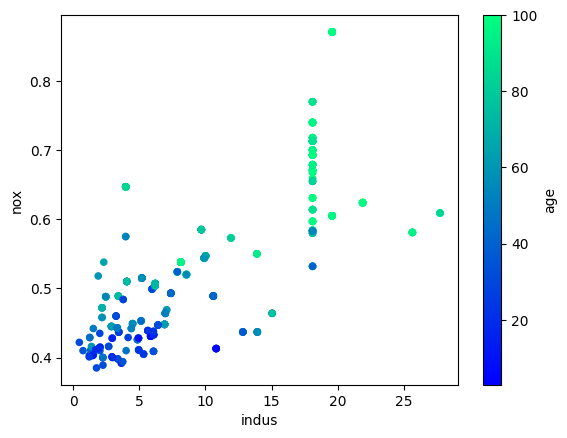

In [ ]:
df.plot.scatter(x='indus', y='nox', c = 'age', colormap="winter");

In [ ]:
df.corr(numeric_only=True).nox.sort_values(ascending=False)

,nox
nox,1.000000
indus,0.765616
age,0.731065
tax,0.668600
rad,0.611317
lstat,0.570801
crim,0.418983
ptratio,0.188849
chas,0.090537
rm,-0.298057


In [ ]:
from sklearn.linear_model import LinearRegression

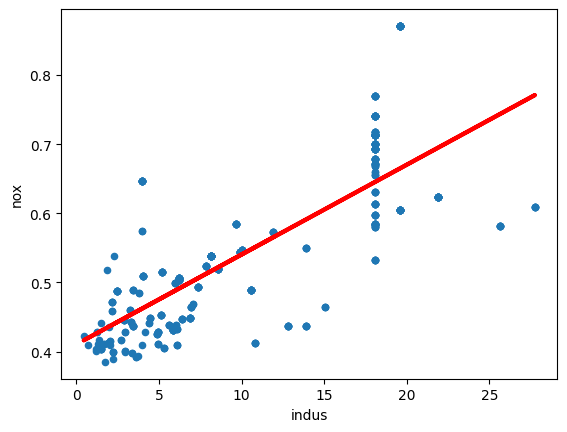

In [ ]:
# Create a linear regression model
model = LinearRegression()

X_train = df['indus'].values.reshape(-1, 1)
y_train = df['nox']

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(df['indus'].values.reshape(-1, 1))

# Plot the data and the regression line
df.plot.scatter('indus', 'nox')
plt.plot(df['indus'], y_pred, color='red', linewidth=3)
plt.xlabel('indus')
plt.ylabel('nox')
plt.show()

In [ ]:
print('Correlation coefficient:', model.score(X_train, y_train))

Correlation coefficient: 0.5861675376906854


In [ ]:
#Find y intercept(c)and slope(m) values as below:

#To retrieve the y intercept (c):
print("Intercept : ", model.intercept_)

#To retrieve the slope (m):
print("Slope_coef : ", model.coef_)

Intercept :  0.4103464355442717
Slope_coef :  [0.01299613]


###The Correlation Coefficient is too low to be an accurate model so I need to explore other options

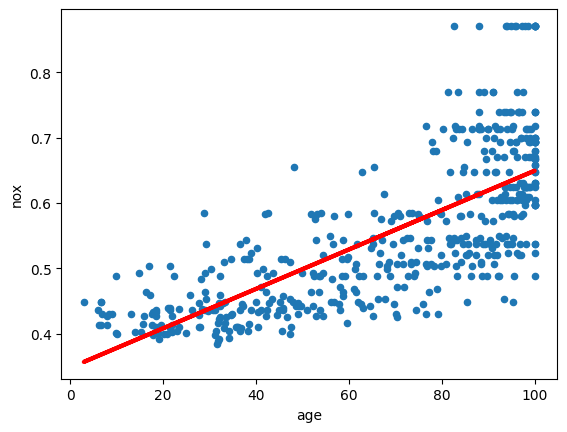

In [ ]:
# Create a linear regression model
model = LinearRegression()

X_train = df['age'].values.reshape(-1, 1)
y_train = df['nox']

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(df['age'].values.reshape(-1, 1))

# Plot the data and the regression line
df.plot.scatter('age', 'nox')
plt.plot(df['age'], y_pred, color='red', linewidth=3)
plt.xlabel('age')
plt.ylabel('nox')
plt.show()

In [ ]:
print('Correlation coefficient:', model.score(X_train, y_train))

Correlation coefficient: 0.5344554098818373


In [ ]:
#Find y intercept(c)and slope(m) values as below:

#To retrieve the y intercept (c):
print("Intercept : ", model.intercept_)

#To retrieve the slope (m):
print("Slope_coef : ", model.coef_)

Intercept :  0.34830881674202074
Slope_coef :  [0.00301287]


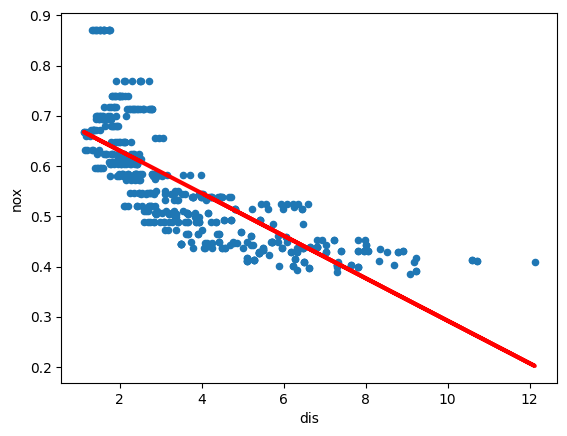

In [ ]:
# Create a linear regression model
model = LinearRegression()

X_train = df['dis'].values.reshape(-1, 1)
y_train = df['nox']

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(df['dis'].values.reshape(-1, 1))

# Plot the data and the regression line
df.plot.scatter('dis', 'nox')
plt.plot(df['dis'], y_pred, color='red', linewidth=3)
plt.xlabel('dis')
plt.ylabel('nox')
plt.show()

In [ ]:
print('Correlation coefficient:', model.score(X_train, y_train))

Correlation coefficient: 0.5911728512010401


In [ ]:
print(f"Slope_coef: {model.coef_}")

Slope_coef: [-0.04233953]


In [ ]:
print(f'Intercept: {model.intercept_}')

Intercept: 0.7155772883704964


In [ ]:
calc_pred = model.intercept_ + (X_train*model.coef_)

In [ ]:
(calc_pred == y_pred).all()

np.False_

In [ ]:
# New dataframe
new_data = pd.DataFrame({'dis': [6, 3, 5, 9]})

# Predict nox using the model
new_predictions = model.predict(new_data['dis'].values.reshape(-1, 1))

# Print the predictions
print(new_predictions)

[0.46154012 0.5885587  0.50387965 0.33452153]


In [ ]:
new_data

,dis
0,6
1,3
2,5
3,9


In [ ]:
new_predictions

array([0.46154012, 0.5885587 , 0.50387965, 0.33452153])

In [ ]:
model.intercept_ + (6*model.coef_)

array([0.46154012])

In [ ]:
calc_pred = model.intercept_ + (new_data['dis']*model.coef_)

In [ ]:
calc_pred

,dis
0,0.461540
1,0.588559
2,0.503880
3,0.334522


In [ ]:
(calc_pred == new_predictions).all()

np.True_

In [ ]:
correlation_matrix = df.corr()

correlation_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.202219,0.405506,-0.053651,0.418983,-0.218193,0.353998,-0.379437,0.621363,0.577678,0.286056,-0.386536,0.450705,-0.382148
zn,-0.202219,1.000000,-0.537521,-0.043530,-0.519278,0.311014,-0.572244,0.667202,-0.315064,-0.319417,-0.391872,0.176822,-0.396099,0.365532
indus,0.405506,-0.537521,1.000000,0.063471,0.765616,-0.384341,0.643822,-0.707115,0.600937,0.729768,0.384548,-0.358841,0.588014,-0.478962
chas,-0.053651,-0.043530,0.063471,1.000000,0.090537,0.093846,0.086347,-0.098960,-0.008673,-0.037618,-0.121479,0.049435,-0.042285,0.187149
nox,0.418983,-0.519278,0.765616,0.090537,1.000000,-0.298057,0.731065,-0.768878,0.611317,0.668600,0.188849,-0.379396,0.570801,-0.426564
rm,-0.218193,0.311014,-0.384341,0.093846,-0.298057,1.000000,-0.237954,0.195317,-0.208871,-0.289996,-0.355045,0.128014,-0.592770,0.674331
age,0.353998,-0.572244,0.643822,0.086347,0.731065,-0.237954,1.000000,-0.747338,0.457166,0.508690,0.261180,-0.273344,0.587725,-0.389914
dis,-0.379437,0.667202,-0.707115,-0.098960,-0.768878,0.195317,-0.747338,1.000000,-0.495553,-0.536332,-0.232457,0.291231,-0.483068,0.254355
rad,0.621363,-0.315064,0.600937,-0.008673,0.611317,-0.208871,0.457166,-0.495553,1.000000,0.910102,0.465992,-0.443694,0.486831,-0.376307
tax,0.577678,-0.319417,0.729768,-0.037618,0.668600,-0.289996,0.508690,-0.536332,0.910102,1.000000,0.463274,-0.441240,0.539792,-0.461654


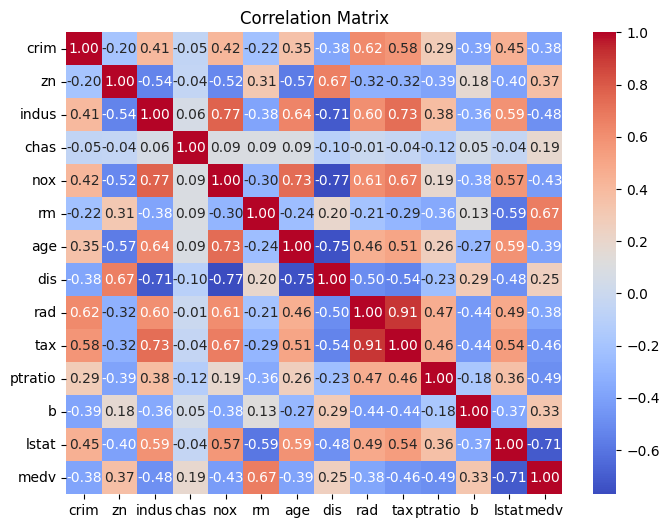

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()